# Lab 6

In [57]:
print('Ewere Alizomor')

Ewere Alizomor


You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it. 

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16). 
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [59]:
import random

class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
    
    def __init__(self, num_decks=1):
        self.num_decks = num_decks
        self.cards = self._create_deck()
        self.shuffle_deck()
        self.plastic_card_position = random.randint(0, len(self.cards) - 1)
        
    def _create_deck(self):
        return [Card(suit, rank) for suit in self.suits for rank in self.ranks] * self.num_decks
    
    def shuffle_deck(self):
        random.shuffle(self.cards)
    
    def draw_card(self):
        card = self.cards.pop(0)
        if len(self.cards) == self.plastic_card_position:
            print("Plastic card dealt! Shuffling the remaining cards...")
            self.shuffle_deck()
        return card
    
    def __repr__(self):
        return f"Deck of {len(self.cards)} cards"

# Example usage
deck = Deck(num_decks=2)
print(deck)
print(deck.draw_card())
print(deck.draw_card())


Deck of 104 cards
4 of Hearts
6 of Clubs


2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook. 

In [ ]:
                +------------------+
                |      Card         |
                +------------------+
                | - rank: str      |
                | - suit: str      |
                +------------------+
                | + __repr__()     |
                +------------------+
                          ▲
                          │
          +--------------------------------+
          |            Deck               |
          +--------------------------------+
          | - num_decks: int              |
          | - cards: deque<Card>          |
          | - plastic_card_position: int  |
          +--------------------------------+
          | + _initialize_deck()          |
          | + shuffle()                   |
          | + draw_card()                 |
          | + __len__()                   |
          | + __repr__()                  |
          +--------------------------------+

                          ▲
                          │
            +-------------------------+
            |         Hand             |
            +-------------------------+
            | - cards: list[Card]     |
            +-------------------------+
            | + add_card(card)        |
            | + get_value()           |
            | + __repr__()            |
            +-------------------------+

                          ▲
                          │
          +--------------------------------+
          |            Player              |
          +--------------------------------+
          | - name: str                   |
          | - hand: Hand                  |
          | - chips: int                  |
          +--------------------------------+
          | + make_move(game)             |
          | + __repr__()                  |
          +--------------------------------+
              ▲         ▲         ▲
              │         │         │
    +----------------+  |  +-----------------+
    |    Dealer      |  |  |  HumanPlayer    |
    +----------------+  |  +-----------------+
    | + make_move()  |  |  | + make_move()   |
    +----------------+  |  +-----------------+
                        │
        +------------------------------------+
        |         StrategyPlayer             |
        +------------------------------------+
        | - count: int                      |
        | - threshold: int                  |
        +------------------------------------+
        | + update_count(card)              |
        | + make_move(game)                 |
        +------------------------------------+

                              ▲
                              │
              +--------------------------------+
              |            Game                |
              +--------------------------------+
              | - deck: Deck                  |
              | - players: list[Player]       |
              | - rounds_played: int          |
              +--------------------------------+
              | + _setup_players(num_players) |
              | + play_round()                |
              | + run_simulation()            |
              +--------------------------------+


3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [19]:
from collections import deque

class Card:
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit

    def __repr__(self):
        return f"{self.rank} of {self.suit}"


class Deck:
    def __init__(self, num_decks):
        self.num_decks = num_decks
        self.cards = deque()
        self.plastic_card_position = None

    def _initialize_deck(self):
        pass  # To be implemented

    def shuffle(self):
        pass  # To be implemented

    def draw_card(self):
        pass  # To be implemented

    def __len__(self):
        return len(self.cards)

    def __repr__(self):
        return f"Deck of {len(self.cards)} cards"


class Hand:
    def __init__(self):
        self.cards = []

    def add_card(self, card):
        pass  # To be implemented

    def get_value(self):
        pass  # To be implemented

    def __repr__(self):
        return f"Hand with {len(self.cards)} cards"


class Player:
    def __init__(self, name, chips):
        self.name = name
        self.hand = Hand()
        self.chips = chips

    def make_move(self, game):
        pass  # To be implemented

    def __repr__(self):
        return f"Player {self.name} with {self.chips} chips"


class Dealer(Player):
    def make_move(self, game):
        pass  # To be implemented


class HumanPlayer(Player):
    def make_move(self, game):
        pass  # To be implemented


class StrategyPlayer(Player):
    def __init__(self, name, chips, threshold):
        super().__init__(name, chips)
        self.count = 0
        self.threshold = threshold

    def update_count(self, card):
        pass  # To be implemented

    def make_move(self, game):
        pass  # To be implemented


class Game:
    def __init__(self):
        self.deck = None
        self.players = []
        self.rounds_played = 0

    def _setup_players(self, num_players):
        pass  # To be implemented

    def play_round(self):
        pass  # To be implemented

    def run_simulation(self):
        pass  # To be implemented


4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [37]:
from collections import deque
import random

class Card:
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit

    def __repr__(self):
        return f"{self.rank} of {self.suit}"


class Deck:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']

    def __init__(self, num_decks=1):
        self.num_decks = num_decks
        self.cards = self._initialize_deck()
        self.shuffle()
        self.plastic_card_position = random.randint(0, len(self.cards) - 1)
    
    def _initialize_deck(self):
        return deque([Card(rank, suit) for suit in self.suits for rank in self.ranks] * self.num_decks)
    
    def shuffle(self):
        random.shuffle(self.cards)
    
    def draw_card(self):
        card = self.cards.popleft()
        if len(self.cards) == self.plastic_card_position:
            print("Plastic card dealt! Shuffling the remaining cards...")
            self.shuffle()
        return card
    
    def __len__(self):
        return len(self.cards)

    def __repr__(self):
        return f"Deck of {len(self.cards)} cards"


class Hand:
    def __init__(self):
        self.cards = []

    def add_card(self, card):
        self.cards.append(card)

    def get_value(self):
        return sum(self.card_value(card) for card in self.cards)

    def card_value(self, card):
        if card.rank.isdigit():
            return int(card.rank)
        elif card.rank in ['Jack', 'Queen', 'King']:
            return 10
        elif card.rank == 'Ace':
            return 11  # Simplified value for Ace

    def __repr__(self):
        return f"Hand with {len(self.cards)} cards"


class Player:
    def __init__(self, name, chips):
        self.name = name
        self.hand = Hand()
        self.chips = chips

    def make_move(self, game):
        pass  # To be implemented by subclasses

    def __repr__(self):
        return f"Player {self.name} with {self.chips} chips"


class Dealer(Player):
    def make_move(self, game):
        while self.hand.get_value() < 17:
            self.hand.add_card(game.deck.draw_card())
        print(f"Dealer's hand: {self.hand}")


class HumanPlayer(Player):
    def make_move(self, game):
        move = input("Do you want to 'hit' or 'stand'? ")
        while move.lower() == 'hit':
            self.hand.add_card(game.deck.draw_card())
            print(f"Your hand: {self.hand}")
            if self.hand.get_value() >= 21:
                break
            move = input("Do you want to 'hit' or 'stand'? ")
        print(f"Your final hand: {self.hand}")


class Game:
    def __init__(self):
        self.deck = Deck(num_decks=1)
        self.players = []
        self.rounds_played = 0

    def _setup_players(self, num_players):
        for _ in range(num_players):
            name = input("Enter player name: ")
            self.players.append(HumanPlayer(name, chips=100))
        self.players.append(Dealer("Dealer", chips=1000))

    def play_round(self):
        for player in self.players:
            player.hand = Hand()
        
        for _ in range(2):
            for player in self.players:
                player.hand.add_card(self.deck.draw_card())
        
        for player in self.players:
            print(f"{player.name}'s hand: {player.hand}")
            player.make_move(self)
        
        self.rounds_played += 1

    def run_simulation(self):
        num_players = int(input("Enter number of players: "))
        self._setup_players(num_players)
        while True:
            self.play_round()
            if input("Do you want to play another round? (yes/no) ").lower() != 'yes':
                break


5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [41]:
class SimulatedDealer(Dealer):
    def make_move(self, game):
        while self.hand.get_value() < 17:
            self.hand.add_card(game.deck.draw_card())
        print(f"{self.name}'s hand: {self.hand}")


class SimulatedGame(Game):
    def _setup_players(self, num_players):
        for i in range(num_players):
            self.players.append(SimulatedDealer(f"Dealer {i + 1}", chips=1000))
    
    def play_round(self):
        for player in self.players:
            player.hand = Hand()
        
        for _ in range(2):
            for player in self.players:
                player.hand.add_card(self.deck.draw_card())
        
        for player in self.players:
            print(f"{player.name}'s hand: {player.hand}")
            player.make_move(self)
        
        self.rounds_played += 1

    def run_simulation(self, num_rounds):
        num_players = 3  # Simulate 3 dealer players
        self._setup_players(num_players)
        for _ in range(num_rounds):
            print(f"--- Round {self.rounds_played + 1} ---")
            self.play_round()
            print("\n")

# Example usage
simulated_game = SimulatedGame()
simulated_game.run_simulation(num_rounds=3)


--- Round 1 ---
Dealer 1's hand: Hand with 2 cards
Dealer 1's hand: Hand with 3 cards
Dealer 2's hand: Hand with 2 cards
Dealer 2's hand: Hand with 3 cards
Dealer 3's hand: Hand with 2 cards
Dealer 3's hand: Hand with 3 cards


--- Round 2 ---
Dealer 1's hand: Hand with 2 cards
Dealer 1's hand: Hand with 3 cards
Dealer 2's hand: Hand with 2 cards
Dealer 2's hand: Hand with 3 cards
Dealer 3's hand: Hand with 2 cards
Dealer 3's hand: Hand with 2 cards


--- Round 3 ---
Dealer 1's hand: Hand with 2 cards
Dealer 1's hand: Hand with 4 cards
Dealer 2's hand: Hand with 2 cards
Dealer 2's hand: Hand with 3 cards
Dealer 3's hand: Hand with 2 cards
Dealer 3's hand: Hand with 2 cards




6. Implement a new player with the following strategy:

    * Assign each card a value: 
        * Cards 2 to 6 are +1 
        * Cards 7 to 9 are 0 
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [56]:
import random

class CountingPlayer:
    def __init__(self, hit_threshold=-2):
        self.hit_threshold = hit_threshold
        self.card_values = {
            '2': 1, '3': 1, '4': 1, '5': 1, '6': 1,
            '7': 0, '8': 0, '9': 0,
            '10': -1, 'J': -1, 'Q': -1, 'K': -1, 'A': -1
        }
        self.count = 0
        self.seen_cards = []

    def reset_count(self):
        self.count = 0
        self.seen_cards = []

    def update_count(self, card):
        self.count += self.card_values.get(card, 0)
        self.seen_cards.append(card)

    def play(self, hand, dealer_up_card, deck):

        hand_value = self.calculate_hand_value(hand)

        if self.count <= self.hit_threshold:
            return "hit"
        else:
            if hand_value >= 21:
                return "stay"
            else:
                return "stay"

    def calculate_hand_value(self, hand):
       
        value = 0
        aces = 0
        for card in hand:
            if card.isdigit():
                value += int(card)
            elif card in ('J', 'Q', 'K'):
                value += 10
            elif card == 'A':
                value += 1
                aces += 1

        while value + 10 <= 21 and aces > 0:
            value += 10
            aces -= 1

        return value

    def receive_cards(self, cards):
        
        for card in cards:
            self.update_count(card)

def create_deck(num_decks=1):

    suits = ['H', 'D', 'C', 'S']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    deck = [rank for _ in range(num_decks) for rank in ranks for _ in suits]
    random.shuffle(deck)
    return deck

def deal_card(deck):
   
    if not deck:
        return None
    return deck.pop(0)

def play_blackjack_round(player, deck):
    
    player.reset_count() # important to reset the count at the beginning of each round.
    player_hand = [deal_card(deck), deal_card(deck)]
    dealer_hand = [deal_card(deck), deal_card(deck)]
    dealer_up_card = dealer_hand[0]

    player.receive_cards(player_hand)
    player.receive_cards([dealer_up_card]) # the dealer upcard is visible.

    while player.play(player_hand, dealer_up_card, deck) == "hit":
        card = deal_card(deck)
        if card is None:
            break
        player_hand.append(card)
        player.receive_cards([card])
        if player.calculate_hand_value(player_hand) > 21:
            break

    dealer_hand_value = player.calculate_hand_value(dealer_hand)
    if player.calculate_hand_value(player_hand) > 21:
        return "Dealer wins"

    while player.calculate_hand_value(dealer_hand) < 17:
        card = deal_card(deck)
        if card is None:
            break
        dealer_hand.append(card)
        dealer_hand_value = player.calculate_hand_value(dealer_hand)

    player_value = player.calculate_hand_value(player_hand)
    dealer_value = player.calculate_hand_value(dealer_hand)

    if dealer_value > 21:
        return "Player wins"
    elif player_value > dealer_value:
        return "Player wins"
    elif player_value < dealer_value:
        return "Dealer wins"
    else:
        return "Push"

# Example usage:
player = CountingPlayer(hit_threshold=-2)
deck = create_deck(num_decks=6) #using 6 decks is common

num_rounds = 10000
player_wins = 0
dealer_wins = 0
pushes = 0

for _ in range(num_rounds):
    result = play_blackjack_round(player, deck)
    if result == "Player wins":
        player_wins += 1
    elif result == "Dealer wins":
        dealer_wins += 1
    else:
        pushes += 1
    if len(deck) < 52: #reshuffle if the deck is too small.
        deck = create_deck(num_decks=6)

print(f"Player wins: {player_wins}")
print(f"Dealer wins: {dealer_wins}")
print(f"Pushes: {pushes}")

Player wins: 3069
Dealer wins: 6654
Pushes: 277


7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [55]:
import random

class CountingPlayer:
    def __init__(self, hit_threshold=-2, chips=100, verbose=False):
        self.hit_threshold = hit_threshold
        self.card_values = {
            '2': 1, '3': 1, '4': 1, '5': 1, '6': 1,
            '7': 0, '8': 0, '9': 0,
            '10': -1, 'J': -1, 'Q': -1, 'K': -1, 'A': -1
        }
        self.count = 0
        self.seen_cards = []
        self.chips = chips
        self.verbose = verbose

    def reset_count(self):
        self.count = 0
        self.seen_cards = []

    def update_count(self, card):
        self.count += self.card_values.get(card, 0)
        self.seen_cards.append(card)

    def play(self, hand, dealer_up_card, deck):
        hand_value = self.calculate_hand_value(hand)
        while self.count <= self.hit_threshold and hand_value < 21:
            card = deal_card(deck)
            if not card:
                break
            hand.append(card)
            self.update_count(card)
            hand_value = self.calculate_hand_value(hand)
            if self.verbose:
                print(f"[CountingPlayer] Hits and draws {card}. Hand: {hand}, Value: {hand_value}, Count: {self.count}")

        return "stay"

    def calculate_hand_value(self, hand):
        value = 0
        aces = 0
        for card in hand:
            if card.isdigit():
                value += int(card)
            elif card in ('J', 'Q', 'K'):
                value += 10
            elif card == 'A':
                value += 1
                aces += 1
        while aces > 0 and value + 10 <= 21:
            value += 10
            aces -= 1
        return value

    def receive_cards(self, cards):
        for card in cards:
            self.update_count(card)

    def bet(self, amount):
        bet_amount = min(amount, self.chips)
        self.chips -= bet_amount
        return bet_amount

    def receive_winnings(self, amount):
        self.chips += amount


class DealerPlayer:
    def __init__(self, chips=100, verbose=False):
        self.chips = chips
        self.verbose = verbose

    def play(self, hand, dealer_up_card, deck):
        hand_value = self.calculate_hand_value(hand)
        while hand_value < 17:
            card = deal_card(deck)
            if not card:
                break
            hand.append(card)
            hand_value = self.calculate_hand_value(hand)
            if self.verbose:
                print(f"[DealerPlayer] Hits and draws {card}. Hand: {hand}, Value: {hand_value}")

        return "stay"

    def calculate_hand_value(self, hand):
        value = 0
        aces = 0
        for card in hand:
            if card.isdigit():
                value += int(card)
            elif card in ('J', 'Q', 'K'):
                value += 10
            elif card == 'A':
                value += 1
                aces += 1
        while aces > 0 and value + 10 <= 21:
            value += 10
            aces -= 1
        return value

    def bet(self, amount):
        bet_amount = min(amount, self.chips)
        self.chips -= bet_amount
        return bet_amount

    def receive_winnings(self, amount):
        self.chips += amount


def create_deck(num_decks=6):
    suits = ['H', 'D', 'C', 'S']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    deck = [rank for _ in range(num_decks) for rank in ranks for _ in suits]
    random.shuffle(deck)
    return deck


def deal_card(deck):
    return deck.pop(0) if deck else None


def play_blackjack_round(players, dealer, deck, verbose=False):
    # Deal dealer hand
    dealer_hand = [deal_card(deck), deal_card(deck)]
    dealer_up_card = dealer_hand[0]

    if verbose:
        print(f"\nDealer's hand: [{dealer_up_card}, ?]")

    # Players see dealer up card and reset counts (CountingPlayer only)
    for player in players:
        if isinstance(player, CountingPlayer):
            player.reset_count()
            player.receive_cards([dealer_up_card])

    # Deal two cards to each player
    player_hands = {}
    for player in players:
        hand = [deal_card(deck), deal_card(deck)]
        player_hands[player] = hand
        if isinstance(player, CountingPlayer):
            player.receive_cards(hand)
        if verbose:
            print(f"{player.__class__.__name__} starting hand: {hand}")

    # Collect bets
    player_bets = {player: player.bet(10) for player in players}

    # Players take actions
    for player, hand in player_hands.items():
        player.play(hand, dealer_up_card, deck)

    # Dealer plays
    dealer.play(dealer_hand, dealer_up_card, deck)
    dealer_value = dealer.calculate_hand_value(dealer_hand)
    dealer_bust = dealer_value > 21

    if verbose:
        print(f"Dealer final hand: {dealer_hand} (Value: {dealer_value})")

    # Settle bets
    for player, hand in player_hands.items():
        player_value = player.calculate_hand_value(hand)
        bet = player_bets[player]

        if verbose:
            print(f"{player.__class__.__name__} hand: {hand} (Value: {player_value})")

        if player_value > 21:
            if verbose:
                print(f"{player.__class__.__name__} busts! Loses bet of {bet}")
            continue
        elif dealer_bust or player_value > dealer_value:
            winnings = bet * 2
            player.receive_winnings(winnings)
            if verbose:
                print(f"{player.__class__.__name__} wins! Receives {winnings}")
        elif player_value == dealer_value:
            player.receive_winnings(bet)
            if verbose:
                print(f"{player.__class__.__name__} pushes. Bet returned {bet}")
        else:
            if verbose:
                print(f"{player.__class__.__name__} loses. Loses bet {bet}")


def simulate_game(num_rounds=50, verbose=False):
    counting_player = CountingPlayer(verbose=verbose)
    dealer_players = [DealerPlayer(verbose=verbose) for _ in range(3)]
    dealer = DealerPlayer(verbose=verbose)
    players = [counting_player] + dealer_players

    deck = create_deck(num_decks=6)
    starting_chips = counting_player.chips

    for round_number in range(1, num_rounds + 1):
        if counting_player.chips <= 0:
            if verbose:
                print("CountingPlayer is out of chips!")
            break

        if verbose:
            print(f"\n=== Round {round_number} ===")

        play_blackjack_round(players, dealer, deck, verbose)

        # Reshuffle if deck gets low
        if len(deck) < 52:
            deck = create_deck(num_decks=6)
            if verbose:
                print("Reshuffling deck...")

    final_chips = counting_player.chips
    winnings = final_chips - starting_chips
    print(f"\nSimulation complete after {round_number} rounds.")
    print(f"CountingPlayer final chip count: {final_chips}")
    print(f"CountingPlayer winnings: {winnings}")
    return winnings


# Run the simulation (verbose=False for clean output)
winnings = simulate_game(num_rounds=50, verbose=True)



=== Round 1 ===

Dealer's hand: [Q, ?]
CountingPlayer starting hand: ['2', '10']
DealerPlayer starting hand: ['7', '2']
DealerPlayer starting hand: ['8', '7']
DealerPlayer starting hand: ['J', 'J']
[DealerPlayer] Hits and draws 8. Hand: ['7', '2', '8'], Value: 17
[DealerPlayer] Hits and draws 10. Hand: ['8', '7', '10'], Value: 25
Dealer final hand: ['Q', '9'] (Value: 19)
CountingPlayer hand: ['2', '10'] (Value: 12)
CountingPlayer loses. Loses bet 10
DealerPlayer hand: ['7', '2', '8'] (Value: 17)
DealerPlayer loses. Loses bet 10
DealerPlayer hand: ['8', '7', '10'] (Value: 25)
DealerPlayer busts! Loses bet of 10
DealerPlayer hand: ['J', 'J'] (Value: 20)
DealerPlayer wins! Receives 20

=== Round 2 ===

Dealer's hand: [6, ?]
CountingPlayer starting hand: ['K', 'A']
DealerPlayer starting hand: ['7', 'Q']
DealerPlayer starting hand: ['A', '7']
DealerPlayer starting hand: ['J', '5']
[DealerPlayer] Hits and draws 10. Hand: ['J', '5', '10'], Value: 25
[DealerPlayer] Hits and draws 10. Hand: ['

8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?



Simulation complete after 31 rounds.
CountingPlayer final chip count: 0
CountingPlayer winnings: -100

Simulation complete after 47 rounds.
CountingPlayer final chip count: 0
CountingPlayer winnings: -100

Simulation complete after 15 rounds.
CountingPlayer final chip count: 0
CountingPlayer winnings: -100

Simulation complete after 15 rounds.
CountingPlayer final chip count: 0
CountingPlayer winnings: -100

Simulation complete after 23 rounds.
CountingPlayer final chip count: 0
CountingPlayer winnings: -100

Simulation complete after 13 rounds.
CountingPlayer final chip count: 0
CountingPlayer winnings: -100

Simulation complete after 50 rounds.
CountingPlayer final chip count: 40
CountingPlayer winnings: -60

Simulation complete after 19 rounds.
CountingPlayer final chip count: 0
CountingPlayer winnings: -100

Simulation complete after 15 rounds.
CountingPlayer final chip count: 0
CountingPlayer winnings: -100

Simulation complete after 15 rounds.
CountingPlayer final chip count: 0


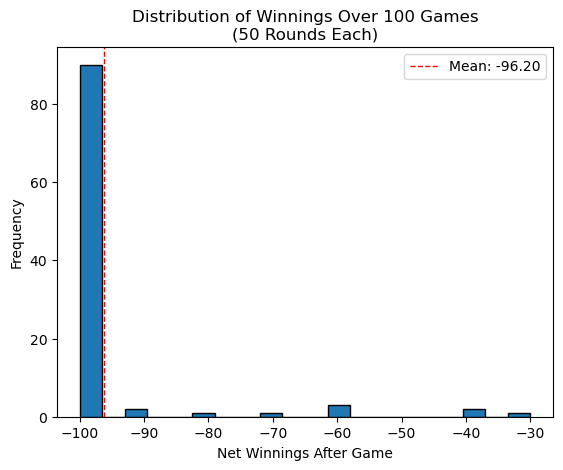

In [49]:
import random
import matplotlib.pyplot as plt
import statistics

# Include the same CountingPlayer, DealerPlayer, and game logic from the previous answer here.
# I'll assume those are already defined, so we jump to the simulation loop.

def run_multiple_simulations(num_games=100, rounds_per_game=50):
    winnings_list = []
    
    for game in range(num_games):
        winnings = simulate_game(num_rounds=rounds_per_game, verbose=False)
        winnings_list.append(winnings)

        # Progress update every 10 games
        if (game + 1) % 10 == 0:
            print(f"Completed {game + 1}/{num_games} games...")

    return winnings_list

def analyze_results(winnings_list, rounds_per_game=50):
    # Summary statistics
    total_games = len(winnings_list)
    avg_winnings_per_game = sum(winnings_list) / total_games
    avg_winnings_per_round = avg_winnings_per_game / rounds_per_game
    std_dev = statistics.stdev(winnings_list)

    # Probabilities
    net_win_prob = sum(1 for w in winnings_list if w > 0) / total_games
    net_loss_prob = sum(1 for w in winnings_list if w < 0) / total_games

    print("\n=== Simulation Results ===")
    print(f"Total games run: {total_games}")
    print(f"Average winnings per game (after {rounds_per_game} rounds): {avg_winnings_per_game:.2f}")
    print(f"Average winnings per round: {avg_winnings_per_round:.4f}")
    print(f"Standard deviation of winnings: {std_dev:.2f}")
    print(f"Probability of net winning after {rounds_per_game} rounds: {net_win_prob:.2%}")
    print(f"Probability of net losing after {rounds_per_game} rounds: {net_loss_prob:.2%}")

    # Plot histogram
    plt.hist(winnings_list, bins=20, edgecolor='black')
    plt.title(f"Distribution of Winnings Over {total_games} Games\n({rounds_per_game} Rounds Each)")
    plt.xlabel("Net Winnings After Game")
    plt.ylabel("Frequency")
    plt.axvline(avg_winnings_per_game, color='red', linestyle='dashed', linewidth=1, label=f"Mean: {avg_winnings_per_game:.2f}")
    plt.legend()
    plt.show()

# Run 100 simulations of 50-round games
winnings_list = run_multiple_simulations(num_games=100, rounds_per_game=50)

# Analyze and visualize the results
analyze_results(winnings_list, rounds_per_game=50)


9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?


Running simulations for threshold = -4...
  Game 10/100 completed...
  Game 20/100 completed...
  Game 30/100 completed...
  Game 40/100 completed...
  Game 50/100 completed...
  Game 60/100 completed...
  Game 70/100 completed...
  Game 80/100 completed...
  Game 90/100 completed...
  Game 100/100 completed...

Running simulations for threshold = -3...
  Game 10/100 completed...
  Game 20/100 completed...
  Game 30/100 completed...
  Game 40/100 completed...
  Game 50/100 completed...
  Game 60/100 completed...
  Game 70/100 completed...
  Game 80/100 completed...
  Game 90/100 completed...
  Game 100/100 completed...

Running simulations for threshold = -2...
  Game 10/100 completed...
  Game 20/100 completed...
  Game 30/100 completed...
  Game 40/100 completed...
  Game 50/100 completed...
  Game 60/100 completed...
  Game 70/100 completed...
  Game 80/100 completed...
  Game 90/100 completed...
  Game 100/100 completed...

Running simulations for threshold = -1...
  Game 10/100 c

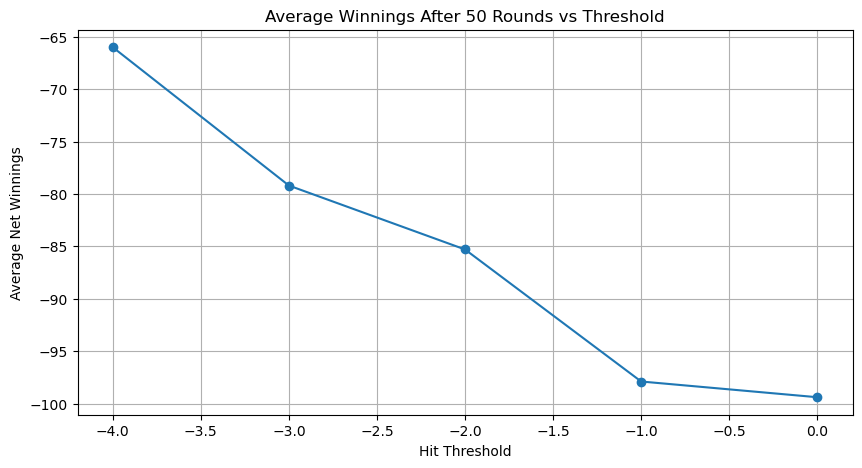

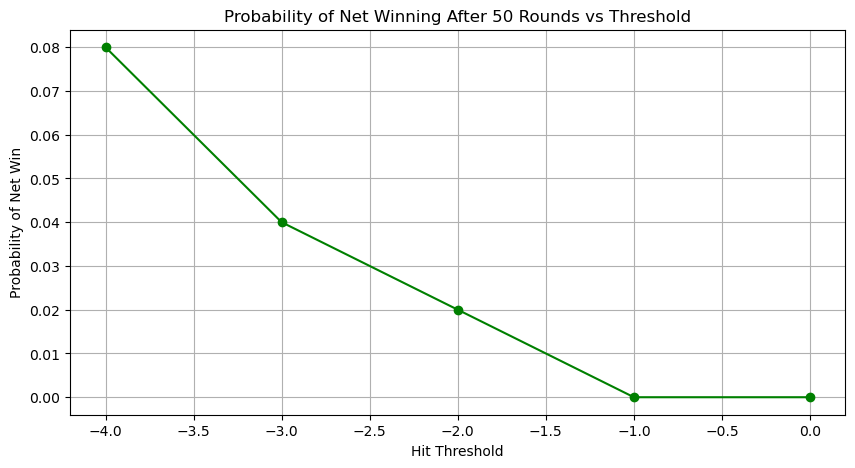


=== Threshold Scan Results ===
Threshold -4: Avg Winnings = -66.00, Std Dev = 44.86, Net Win Prob = 8.00%
Threshold -3: Avg Winnings = -79.20, Std Dev = 32.74, Net Win Prob = 4.00%
Threshold -2: Avg Winnings = -85.30, Std Dev = 32.08, Net Win Prob = 2.00%
Threshold -1: Avg Winnings = -97.90, Std Dev = 11.57, Net Win Prob = 0.00%
Threshold 0: Avg Winnings = -99.40, Std Dev = 4.45, Net Win Prob = 0.00%


In [50]:
import random
import matplotlib.pyplot as plt
import statistics


def simulate_game(num_rounds=50, hit_threshold=-2, verbose=False):
    counting_player = CountingPlayer(hit_threshold=hit_threshold)
    dealer_players = [DealerPlayer() for _ in range(3)]
    dealer = DealerPlayer()
    players = [counting_player] + dealer_players

    deck = create_deck(num_decks=6)

    for _ in range(num_rounds):
        if counting_player.chips <= 0:
            break
        play_blackjack_round(players, dealer, deck)
        if len(deck) < 52:
            deck = create_deck(num_decks=6)

    return counting_player.chips - 100  # Net winnings

def run_threshold_scan(threshold_values, num_games=100, rounds_per_game=50):
    results = {}

    for threshold in threshold_values:
        winnings_list = []
        print(f"\nRunning simulations for threshold = {threshold}...")
        
        for game in range(num_games):
            winnings = simulate_game(num_rounds=rounds_per_game, hit_threshold=threshold, verbose=False)
            winnings_list.append(winnings)

            # Optional progress print
            if (game + 1) % 10 == 0:
                print(f"  Game {game + 1}/{num_games} completed...")

        # Stats for this threshold
        avg_winnings = sum(winnings_list) / num_games
        avg_per_round = avg_winnings / rounds_per_game
        std_dev = statistics.stdev(winnings_list)
        net_win_prob = sum(1 for w in winnings_list if w > 0) / num_games
        net_loss_prob = sum(1 for w in winnings_list if w < 0) / num_games
        
        results[threshold] = {
            'avg_winnings': avg_winnings,
            'avg_per_round': avg_per_round,
            'std_dev': std_dev,
            'net_win_prob': net_win_prob,
            'net_loss_prob': net_loss_prob,
            'winnings_list': winnings_list
        }

    return results

def plot_threshold_analysis(results, rounds_per_game=50):
    thresholds = sorted(results.keys())

    avg_winnings = [results[t]['avg_winnings'] for t in thresholds]
    avg_per_round = [results[t]['avg_per_round'] for t in thresholds]
    std_devs = [results[t]['std_dev'] for t in thresholds]
    net_win_probs = [results[t]['net_win_prob'] for t in thresholds]

    # Plot average winnings per game
    plt.figure(figsize=(10, 5))
    plt.plot(thresholds, avg_winnings, marker='o')
    plt.title(f"Average Winnings After {rounds_per_game} Rounds vs Threshold")
    plt.xlabel("Hit Threshold")
    plt.ylabel("Average Net Winnings")
    plt.grid(True)
    plt.show()

    # Plot probability of net win
    plt.figure(figsize=(10, 5))
    plt.plot(thresholds, net_win_probs, marker='o', color='green')
    plt.title(f"Probability of Net Winning After {rounds_per_game} Rounds vs Threshold")
    plt.xlabel("Hit Threshold")
    plt.ylabel("Probability of Net Win")
    plt.grid(True)
    plt.show()

    
    print("\n=== Threshold Scan Results ===")
    for t in thresholds:
        r = results[t]
        print(f"Threshold {t}: Avg Winnings = {r['avg_winnings']:.2f}, "
              f"Std Dev = {r['std_dev']:.2f}, "
              f"Net Win Prob = {r['net_win_prob']:.2%}")

# Threshold values to test
threshold_values = [-4, -3, -2, -1, 0]

# Run the simulation across thresholds
results = run_threshold_scan(threshold_values, num_games=100, rounds_per_game=50)

plot_threshold_analysis(results, rounds_per_game=50)


10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings. 

In [51]:
class BetRampPlayer:
    def __init__(self, hit_threshold=-2, chips=100):
        self.hit_threshold = hit_threshold
        self.card_values = {
            '2': 1, '3': 1, '4': 1, '5': 1, '6': 1,
            '7': 0, '8': 0, '9': 0,
            '10': -1, 'J': -1, 'Q': -1, 'K': -1, 'A': -1
        }
        self.count = 0
        self.seen_cards = []
        self.chips = chips

    def reset_count(self):
        self.count = 0
        self.seen_cards = []

    def update_count(self, card):
        self.count += self.card_values.get(card, 0)
        self.seen_cards.append(card)

    def play(self, hand, dealer_up_card, deck):
        hand_value = self.calculate_hand_value(hand)

        
        if self.count < 0 and hand_value >= 12:
            return "stay"

        
        if hand_value < 12 or self.count > self.hit_threshold:
            return "hit"

        return "stay"

    def calculate_hand_value(self, hand):
        value = 0
        aces = 0
        for card in hand:
            if card.isdigit():
                value += int(card)
            elif card in ('J', 'Q', 'K'):
                value += 10
            elif card == 'A':
                value += 1
                aces += 1

        while value + 10 <= 21 and aces > 0:
            value += 10
            aces -= 1

        return value

    def receive_cards(self, cards):
        for card in cards:
            self.update_count(card)

    def bet(self, base_bet=10):
        # Bet more when the count is favorable
        if self.count >= 3:
            bet_amount = min(self.chips, base_bet * 5)  # Bet 5x base when count high
        elif self.count >= 1:
            bet_amount = min(self.chips, base_bet * 2)
        else:
            bet_amount = min(self.chips, base_bet)

        self.chips -= bet_amount
        return bet_amount

    def receive_winnings(self, amount):
        self.chips += amount


In [52]:
def simulate_game_dynamic(player_type="counting", num_rounds=50, hit_threshold=-2):
    if player_type == "counting":
        player = CountingPlayer(hit_threshold=hit_threshold)
    elif player_type == "betramp":
        player = BetRampPlayer(hit_threshold=hit_threshold)
    else:
        raise ValueError("Unknown player type")

    dealer_players = [DealerPlayer() for _ in range(3)]
    dealer = DealerPlayer()
    players = [player] + dealer_players

    deck = create_deck(num_decks=6)

    for _ in range(num_rounds):
        if player.chips <= 0:
            break
        play_blackjack_round(players, dealer, deck)
        if len(deck) < 52:
            deck = create_deck(num_decks=6)

    return player.chips - 100  # Net winnings

def run_comparison(num_games=100, rounds_per_game=50):
    results = {
        "counting": [],
        "betramp": []
    }

    print("\nRunning CountingPlayer Simulations...")
    for _ in range(num_games):
        winnings = simulate_game_dynamic(player_type="counting", num_rounds=rounds_per_game, hit_threshold=-2)
        results["counting"].append(winnings)

    print("\nRunning BetRampPlayer Simulations...")
    for _ in range(num_games):
        winnings = simulate_game_dynamic(player_type="betramp", num_rounds=rounds_per_game, hit_threshold=-2)
        results["betramp"].append(winnings)

    return results



Running CountingPlayer Simulations...

Running BetRampPlayer Simulations...


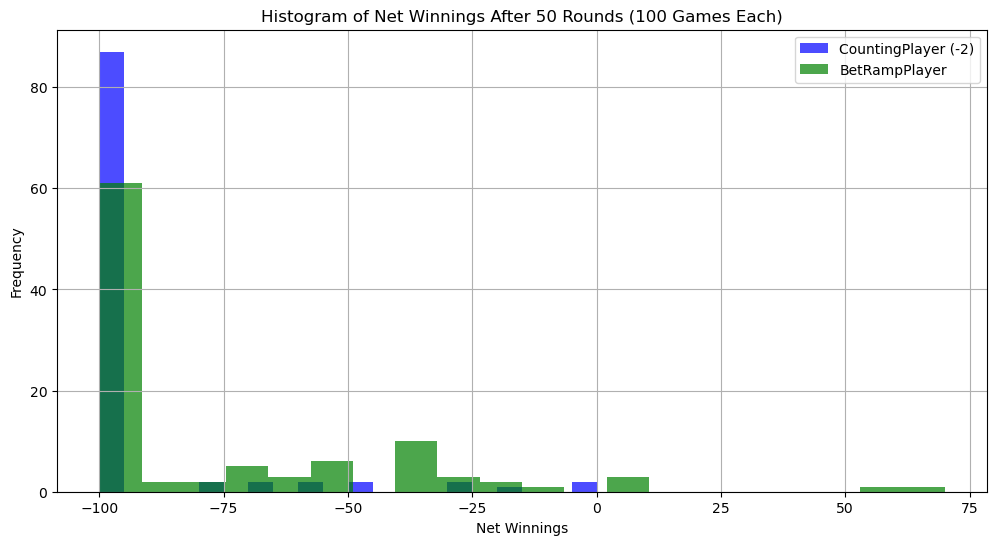


counting Stats:
  Average Winnings: -93.00
  Standard Deviation: 20.62
  Probability of Net Win: 0.00%

betramp Stats:
  Average Winnings: -76.50
  Standard Deviation: 36.58
  Probability of Net Win: 5.00%


In [53]:
results = run_comparison(num_games=100, rounds_per_game=50)

def plot_comparison_histogram(results):
    plt.figure(figsize=(12, 6))

    plt.hist(results["counting"], bins=20, alpha=0.7, label="CountingPlayer (-2)", color='blue')
    plt.hist(results["betramp"], bins=20, alpha=0.7, label="BetRampPlayer", color='green')

    plt.title("Histogram of Net Winnings After 50 Rounds (100 Games Each)")
    plt.xlabel("Net Winnings")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()

def print_comparison_stats(results):
    for player_type in results:
        winnings = results[player_type]
        avg = sum(winnings) / len(winnings)
        std_dev = statistics.stdev(winnings)
        net_win_prob = sum(1 for w in winnings if w > 0) / len(winnings)
        print(f"\n{player_type} Stats:")
        print(f"  Average Winnings: {avg:.2f}")
        print(f"  Standard Deviation: {std_dev:.2f}")
        print(f"  Probability of Net Win: {net_win_prob:.2%}")

plot_comparison_histogram(results)
print_comparison_stats(results)
